# PyGANS with Handwritten Digits

You can run this notebook online using Google Colab:
[[ Run Now ]](https://colab.research.google.com/drive/1Bshgw-z0KALqJvj2kNBqwF32sH3n1-Xs)

In [0]:
!pip install pygans > /dev/null

These imports are necessary to display the animation correctly in Jupyter and Google Colab:

In [0]:
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')

## 0. Import the modules

Keras modules are needed to create the generator and discriminator models.

In [0]:
from pygans.models import Discriminator, GAN, Generator
from pygans.animation import Animation_MNIST
from pygans.dataset import Dataset_Generator_MNIST

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Reshape,Conv2DTranspose
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, LeakyReLU
from keras.optimizers import Adam

## 1. Define your Models

In [0]:
def create_generator(latent_dim):
	model = Sequential()
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model

def create_discriminator(input_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=input_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt , metrics=['accuracy'])
	return model

## 2. Define your Parameters

In [0]:
# Generation Parameters
steps = 25        # Each X number of iterations, a plot is generated

# Define Hyperparameters
latent_dims = 100   # N of dimentions that will have the latent space

# You can define the iterations in terms of epochs as follows
dataset_size = 60000
batch_size = 256                    # Size of the training set in each iteration
epochs = 3
batches = dataset_size // batch_size
iterations = batches * epochs       # N of batches that will feed the model

## 3. Create your Dataset Generator

In [0]:
# Dataset Generation
dataset_generator = Dataset_Generator_MNIST()

## 4. Create the Models

In [0]:
# Create Models
disc_model , gen_model = create_discriminator(), create_generator(latent_dims)
discriminator = Discriminator(disc_model)
generator = Generator(gen_model, latent_dims)
opt = Adam(lr=0.0002, beta_1=0.5)
gan = GAN(discriminator, generator, optimizer=opt)

## 5. Train the GAN

In [8]:
# Train GAN
plots, labels = gan.train(dataset_generator, iterations, batch_size, freq_generation=steps, verbose=1, n_generations=25)

/home/afzp99/miniconda3/envs/jupyter-pygans/lib/python3.7/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'



Iteration: 1 [0.70322526, 0.40234375] 0.6871086


/home/afzp99/miniconda3/envs/jupyter-pygans/lib/python3.7/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Iteration: 2 [0.6971054, 0.453125] 0.7024041
Iteration: 3 [0.6896008, 0.57421875] 0.71315134
Iteration: 4 [0.684073, 0.578125] 0.72770643
Iteration: 5 [0.6761711, 0.6796875] 0.7378557
Iteration: 6 [0.66990316, 0.7578125] 0.7535939
Iteration: 7 [0.66390246, 0.76171875] 0.7659199
Iteration: 8 [0.6596497, 0.78515625] 0.77492857
Iteration: 9 [0.65544575, 0.734375] 0.7862621
Iteration: 10 [0.65055877, 0.79296875] 0.79095685
Iteration: 11 [0.6484843, 0.796875] 0.78953207
Iteration: 12 [0.6495427, 0.84765625] 0.7811787
Iteration: 13 [0.65077186, 0.84375] 0.7670508
Iteration: 14 [0.6533681, 0.90625] 0.7525388
Iteration: 15 [0.65848035, 0.94140625] 0.73480415
Iteration: 16 [0.6575958, 0.94140625] 0.72080415
Iteration: 17 [0.658257, 0.98046875] 0.71077764
Iteration: 18 [0.65594566, 0.9453125] 0.7035036
Iteration: 19 [0.6472481, 0.9296875] 0.69835377
Iteration: 20 [0.6459964, 0.8125] 0.69623554
Iteration: 21 [0.6371984, 0.71484375] 0.69296455
Iteration: 22 [0.63259184, 0.640625] 0.69235516
Iterat

## 5+1. See the evolution of your Generative Adversarial Network step by step

/home/afzp99/miniconda3/envs/jupyter-pygans/lib/python3.7/site-packages/pygans/animation/animation_mnist.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(r, c, 1 + i)
/home/afzp99/miniconda3/envs/jupyter-pygans/lib/python3.7/site-packages/pygans/animation/animation_mnist.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(r, c, 1 + i)


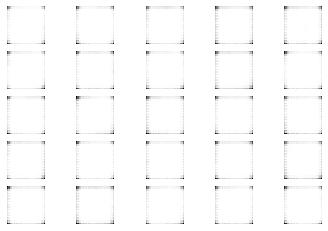

In [9]:
# Animation
fps = 10
anim = Animation_MNIST(plots)
anim_video = anim.get_animation(fps=fps)
anim.save(anim_video, fps, "/tmp")
anim_video

In [0]:
anim.save(anim_video, fps, "/tmp")